# Практическая работа №1. Задача об остывании чашки кофе. Вариант 9

Необходимые библиотеки:

*   **matplotlib** для построения графиков
*   **math** для математических функций
*   **numpy** для работы с двумерными массивами
*   **pandas** для представления табличных данных

In [ ]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

## Задание 1. Определение коэффициента "остывания" r на основе экспериментальных данных для остывания чашки кофе.

In [ ]:
filename = "data.csv"
data = pd.read_csv(filename)
time = data["Время"]
temp = data["Температура"]

In [ ]:
Ts = 26      # температура окружающей среды
T0 = temp[0] # начальная температура чашки

Найдем коэффициент r из закона теплопроводности Ньютона и начального условия
$$\left\{ \begin{array}{cl}
\frac{dT}{dt} = -r(T-T_{s}) \\
T(0) = T_{0} \\
\end{array} \right.$$


Решая ОДУ методом разделения переменных имеем
$$T(t) = T_{s} + (T_{0} - T_{s})e^{-rt}$$
$$r = \frac{1}{t^{*}}ln\left| \frac{T_0-T_s}{T(t^{*})-T_s} \right|,$$  
где t* - некоторый момент времени из эксперементальных данных

In [ ]:
def get_r(T0, Ts, T, t):
    """Вычисление коэффициента r"""
    if t == 0:
        return 0
    return 1 / t * math.log(abs((T0 - Ts) / (T - Ts)))

def T(t, Ts, T0, r):
    """Функция T, решение ОДУ"""
    return Ts - (Ts - T0) * math.exp(-r * t)

In [ ]:
row1, row2, row3 = 15, 20, 25
t1, t2, t3 = time[row1], time[row2], time[row3]
T1, T2, T3 = temp[row1], temp[row2], temp[row3]

# коэффициенты r полученные из аналит. решения в моменты времени t1, t2, t3
r1 = get_r(T0, Ts, T1, t1)
r2 = get_r(T0, Ts, T2, t2)
r3 = get_r(T0, Ts, T3, t3)
print(f"r1 = {r1:.2e}, r2 = {r2:.2e}, r3 = {r3:.2e}")
print(f"T0={T0}, Ts={Ts}")

# температура полученная из аналит. решения
temp1 = [T(t, Ts, T0, r1) for t in time]
temp2 = [T(t, Ts, T0, r2) for t in time]
temp3 = [T(t, Ts, T0, r3) for t in time]

r1 = 2.00e-04, r2 = 2.13e-04, r3 = 3.17e-04
T0=76.0, Ts=26


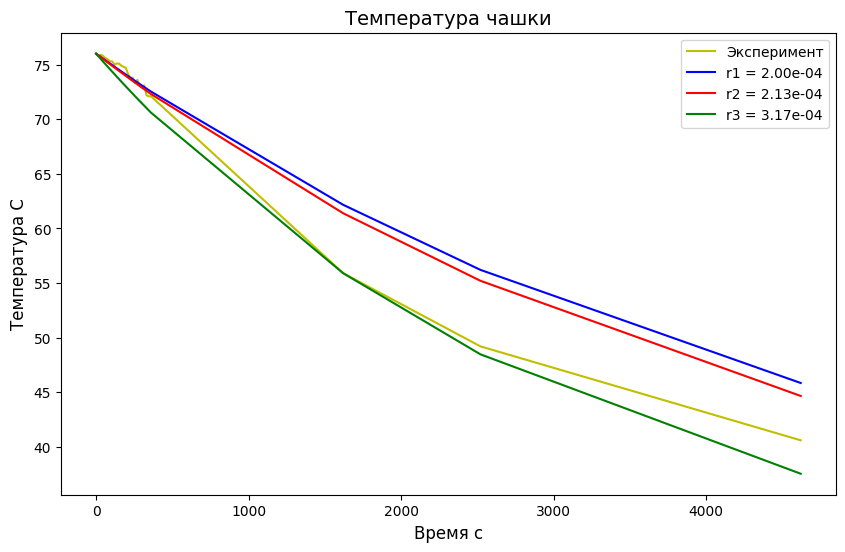

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.plot(time, temp, "y", label="Эксперимент")
plt.plot(time, temp1, "b", label=f"r1 = {r1:.2e}")
plt.plot(time, temp2, "r", label=f"r2 = {r2:.2e}")
plt.plot(time, temp3, "g", label=f"r3 = {r3:.2e}")

plt.title("Температура чашки", fontsize=14)
plt.xlabel("Время с", fontsize=12)
plt.ylabel("Температура С", fontsize=12)
plt.legend()

plt.show()

## Задание 2.
Предположим, что начальная температура кофе 90 (С), однако наслаждаться кофе можно, когда температура опуститься ниже 75 (С). Допустим, что при 90 (С) добавление молока понижает
температуру кофе на 5 (С). Если вы торопитесь и хотите охладить кофе как можно быстрее, будете ли
вы добавлять сначала молоко и ждать, пока кофе остынет, или же подождете до тех пор, пока кофе
остынет до 80 (С), а затем добавите молоко?

Исходные данные


*   начальная температура (С)
*   конечная температура (С)
*   температура среды (С)
*   понижение температуры при добавлении молока ΔT = 5(C)



Из аналитического решения ОДУ выразим момент времени t*
$$t^* = \frac{1}{r}ln\left| \frac{T_0-T_s}{T(t^{*})-T_s} \right|$$

Вариант 1 (молоко в конце)
Определим за какое время t1 температура кофе уменьшится с 90 до 80 градусов
$$t_1 = \frac{1}{r}ln\left| \frac{T_0-T_s}{T(t^*)+\Delta T-T_s} \right|$$

Вариант 2 (сначала молоко)
Определим за какое время t2 температура кофе уменьшится с 90 до 80 градусов
$$t_2 = \frac{1}{r}ln\left| \frac{T_0 - \Delta T-T_s}{T(t^*)-T_s} \right|$$

In [ ]:
T0 = 90
T1 = 75
Ts = 22
r = 0.04
DT = 5
t1 = 1 / r * math.log(abs((T0 - Ts) / (T1 + DT - Ts)))
t2 = 1 / r * math.log(abs((T0 - DT - Ts) / (T1 - Ts)))
print(f"Вариант №1 (без молока) {t1:.2f} (мин)")
print(f"Вариант №2 (с молоком) {t2:.2f} (мин)")

Вариант №1 (без молока) 3.98 (мин)
Вариант №2 (с молоком) 4.32 (мин)


# Результат
Добавление молока в кофе лишь после его остывания до 80 градусов позволяет получить комфортную температуру быстрее.  
Это обосновывается тем, при большей разности температур остывание происходит быстрее

# Задание 3
Разработайте компьютерную программу для численного решения уравнения теплопроводности
Ньютона

Исходные данные программы:  
*   начальное время t0 = 0(мин);  
*   начальная температура кофе T0 = 83.0(C);
*   комнатная температура Ts = 22(C);
*   коэффициент остывания r = 0.09(1/мин);
*   длительность моделирования t = 1(мин);
*   количество шагов по времени N.

Метод Эйлера для численного решения ОДУ вида
$$\frac{dy}{dy} = g(t)$$
Приближение значение функции y(t) в tn определяется по формуле
$$y_n = y_{n-1} + \tau g(t_{n-1}), (n=1,2,...,N)$$

In [ ]:
def eulerMethod(T0, Ts, r, N, t1=1, t0=0):
    '''
    Метод Эйлера численного решения ОДУ
    T0 - начальная температура;
    Ts - комнатная температура;
    r - коэффициент остывания;
    t1 - длительность моделирования;
    N - количество шагов по времени.
    '''

    tau = (t1 - t0) / N
    T_prev = T0
    res = np.zeros((5, N + 1))
    for i in range(N + 1):
        t = t0 + tau * i
        T_true = T(t, Ts, T0, r)
        T_ = T_prev + tau * (-r * (T_true - Ts))
        T_prev = T_

        res[0, i] = t                           # время
        res[1, i] = T_                          # вычисленное значение температуры
        res[2, i] = T_true                      # точное значение температуры
        res[3, i] = abs(res[1, i] - res[2, i])  # абсолютная погрешность
        res[4, i] = res[3, i] / res[2, i]       # относительная погрешность

    return res

In [ ]:
t0 = 0   # Начальное время
t1 = 1   # Конечное время
T0 = 83  # Начальная температура
Ts = 22  # Комнатная температура
r = 0.09 # Коэффициент остывания
N = 10   # Количество шагов интегрирования

In [ ]:
res = eulerMethod(T0, Ts, r, 10, t1, t0)
df = pd.DataFrame({
    "Время": res[0,:],
    "Вычисленное значение температуры": res[1,:],
    "Точное значение температуры": res[2,:],
    "Абсолютная погрешность": res[3,:],
    "Относительная погрешность %": res[4,:]
})
display(df)

,Время,Вычисленное значение температуры,Точное значение температуры,Абсолютная погрешность,Относительная погрешность %
0,0.0,82.451000,83.000000,0.549000,0.006614
1,0.1,81.906919,82.453463,0.546544,0.006629
2,0.2,81.367712,81.911823,0.544111,0.006643
3,0.3,80.833337,81.375036,0.541699,0.006657
4,0.4,80.303750,80.843058,0.539308,0.006671
5,0.5,79.778907,80.315846,0.536939,0.006685
6,0.6,79.258767,79.793358,0.534592,0.006700
7,0.7,78.743287,79.275552,0.532265,0.006714
8,0.8,78.232425,78.762385,0.529959,0.006729
9,0.9,77.726141,78.253815,0.527674,0.006743


# Задание 4
Вычислите температуру в момент t = 1 с шагами, которые уменьшаются в 2 раза. Если шаг уменьшить
в два раза, как изменится погрешность? Постройте таблицу, содержающую разность между точным и численным решениями как функцию Δt.

In [ ]:
def eval_vals(N=10, T0=83, Ts=22, r=0.09, t1=1, t0=0):
    res = np.zeros((5, N))
    error_prev = 1
    for n in range(N):
        res_n = eulerMethod(T0, Ts, r, 10 * 2 ** n, t1, t0)
        res[0, n] = n                     # номер расчета
        res[1, n] = 10 * 2 ** n           # количество разбиений
        res[2, n] = (t1 - t0) / res[1, n] # шаг интегрирования
        res[3, n] = res_n[3, -1]          # значение абс. погр. на последнем шаге
        res[4, n] = math.log(error_prev / res[3, n], 2) # параметр сходимости
        error_prev = res[3, n]
    return res

In [ ]:
N = 10
res = eval_vals(N, T0, Ts, r, t1, t0)
df = pd.DataFrame({
    "Номер расчета": res[0,:],
    "Количество разбиений": res[1,:],
    "Шаг интегрирования": res[2,:],
    "Абс. погрешность на последнем шаге": res[3,:],
    "Параметр сходимости": res[4,:]
})
display(df)

,Номер расчета,Количество разбиений,Шаг интегрирования,Абс. погрешность на последнем шаге,Параметр сходимости
0,0.0,10.0,0.100000,0.525410,0.928486
1,1.0,20.0,0.050000,0.262696,1.000049
2,2.0,40.0,0.025000,0.131346,1.000024
3,3.0,80.0,0.012500,0.065672,1.000012
4,4.0,160.0,0.006250,0.032836,1.000006
5,5.0,320.0,0.003125,0.016418,1.000003
6,6.0,640.0,0.001563,0.008209,1.000002
7,7.0,1280.0,0.000781,0.004104,1.000001
8,8.0,2560.0,0.000391,0.002052,1.000000
9,9.0,5120.0,0.000195,0.001026,1.000000


Из расчетов видно, что при уменьшении шага в 2 раза, абсолютная погрешность также уменьшается в 2 раза

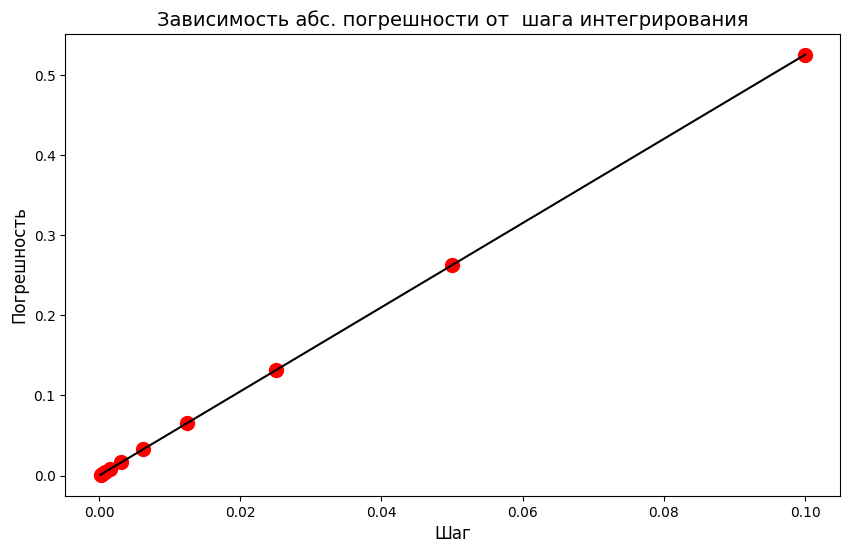

In [ ]:
fig = plt.figure(figsize=(10, 6))
x_values = res[2, :]
y_values = res[3, :]
plt.scatter(x_values, y_values, c="red", s=100)
plt.plot(x_values, y_values, c="black")
plt.title("Зависимость абс. погрешности от  шага интегрирования", fontsize=14)
plt.xlabel("Шаг", fontsize=12)
plt.ylabel("Погрешность", fontsize=12)
plt.show()

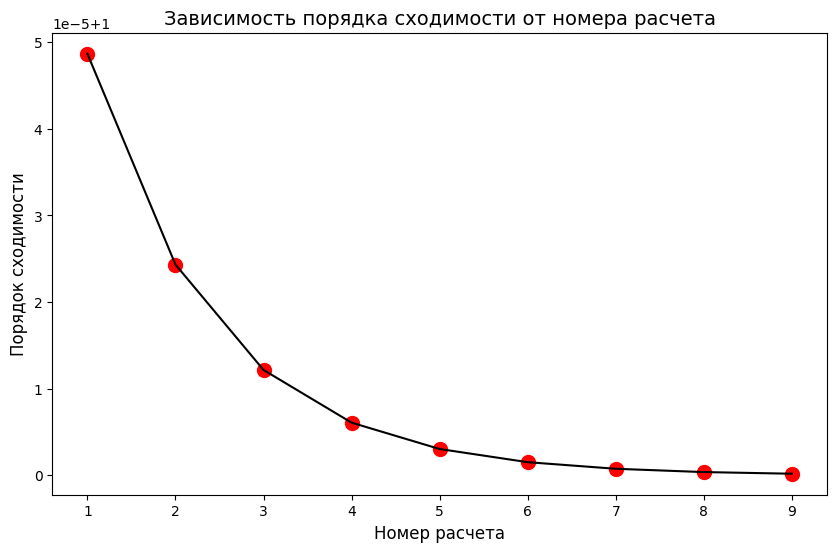

In [ ]:
fig = plt.figure(figsize=(10, 6))
x_values = range(1, N)
y_values = res[4, 1:]
plt.scatter(x_values, y_values, c="red", s=100)
plt.plot(x_values, y_values, c="black")
plt.title("Зависимость порядка сходимости от номера расчета", fontsize=14)
plt.xlabel("Номер расчета", fontsize=12)
plt.ylabel("Порядок сходимости", fontsize=12)
plt.show()

Из графиков зависимости абс.погрешности от кол-ва шагов интегрирования и зависимости порядка сходимости от номера расчета, видно, что метод Эйлера имеет первый порядок сходимости.

# Задание 5
Какой необходимо выбрать величину шага Δt
, чтобы достигалась точность 0.1% в момент времени t = 1? 0.1% в момент времени t=5?

In [ ]:
N = 7
res = eulerMethod(T0, Ts, r, N, 1, 0)
df = pd.DataFrame(
{ "Время": res[0,:],
"Вычисленное значение температуры": res[1,:],
"Точное значение температуры": res[2,:],
"Абсолютная погрешность": res[3,:],
"Относительная погрешность %": res[4,:]
})
display(df)

,Время,Вычисленное значение температуры,Точное значение температуры,Абсолютная погрешность,Относительная погрешность %
0,0.000000,82.215714,83.000000,0.784286,0.009449
1,0.142857,81.441448,82.220735,0.779287,0.009478
2,0.285714,80.677072,81.451424,0.774352,0.009507
3,0.428571,79.922462,80.691942,0.769480,0.009536
4,0.571429,79.177491,79.942161,0.764670,0.009565
5,0.714286,78.442037,79.201959,0.759922,0.009595
6,0.857143,77.715979,78.471213,0.755234,0.009624
7,1.000000,76.999196,77.749802,0.750607,0.009654


Cогласно проведенным расчетам для достижения такой точности требуется 7 шагов по времени,
т.е. Δt = 1/7

In [ ]:
N = 37
res = eulerMethod(T0, Ts, r, N, 5, 0)
df = pd.DataFrame(
{ "Время": res[0,:],
"Вычисленное значение температуры": res[1,:],
"Точное значение температуры": res[2,:],
"Абсолютная погрешность": res[3,:],
"Относительная погрешность %": res[4,:]
})
display(df)

,Время,Вычисленное значение температуры,Точное значение температуры,Абсолютная погрешность,Относительная погрешность %
0,0.000000,82.258108,83.000000,0.741892,0.008938
1,0.135135,81.525185,82.262601,0.737417,0.008964
2,0.270270,80.801121,81.534117,0.732996,0.008990
3,0.405405,80.085810,80.814439,0.728628,0.009016
4,0.540541,79.379147,80.103460,0.724314,0.009042
...,...,...,...,...,...
33,4.459459,62.214793,62.834304,0.619511,0.009859
34,4.594595,61.724163,62.340678,0.616516,0.009889
35,4.729730,61.239464,61.853020,0.613556,0.009920
36,4.864865,60.760624,61.371257,0.610632,0.009950


Cогласно проведенным расчетам для достижения такой точности требуется 37 шагов по времени,
т.е. Δt = 5/37

# Задание 6
Тело с температурой 40°C содержится в среде с постоянной температуре 20°C. Наблюдается, что его температура падает до 35°C за 10 минут. Определить, сколько ещё времени потребуется телу, чтобы достичь температуры 30°C

Из условий имеем следующие данные  
T(0) = 40°C = T0  
T(10) = 35°C  
Ts = 20°C  
Воспользуемся уравнением теплопроводности Ньютона и составим задачу Коши
$$\left\{ \begin{array}{cl}
\frac{dT}{dt} = -r(T-20) \\
T(0) = 40 \\
\end{array} \right.$$



Её решением будет функция T(t)
$$T(t) = 20 + 20e^{-rt}$$
Найдем t такой, что T(t) = 30
$$t = \frac{1}{r}ln\left| \frac{T_0-T_s}{T(t)-T_s} \right|$$
$$t = \frac{1}{r}ln(2)$$
Найдем r, из условия T(10) = 35
$$r = \frac{1}{t}ln\left| \frac{T_0-T_s}{T(t)-T_s} \right|$$
$$r = \frac{1}{10}ln\left| \frac{4}{3} \right|$$
Подставим в формулу для t
$$t=10\frac{ln2}{ln\frac{4}{3}}$$
**t приближенно равен 24.1**